# Plant Disease Prediction using YOLOv8 Classification

This notebook trains a YOLOv8 classification model to identify plant diseases from leaf images.

## 1. Install and Import Required Libraries

In [1]:
# Install ultralytics for YOLOv8
%pip install ultralytics pillow matplotlib opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
from pathlib import Path
import shutil

## 2. Verify Dataset Structure

In [3]:
# Define dataset paths
data_root = "dataset"
train_dir = os.path.join(data_root, "train")
val_dir = os.path.join(data_root, "val")
test_dir = os.path.join(data_root, "test")

# Get class names
classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
print(f"Number of classes: {len(classes)}\n")
print("Classes:")
for i, cls in enumerate(classes, 1):
    train_count = len([f for f in os.listdir(os.path.join(train_dir, cls)) if f.endswith(('.jpg', '.jpeg', '.png'))])
    val_count = len([f for f in os.listdir(os.path.join(val_dir, cls)) if f.endswith(('.jpg', '.jpeg', '.png'))])
    test_count = len([f for f in os.listdir(os.path.join(test_dir, cls)) if f.endswith(('.jpg', '.jpeg', '.png'))])
    print(f"{i}. {cls}: Train={train_count}, Val={val_count}, Test={test_count}")

Number of classes: 24

Classes:
1. Corn___Cercospora_leaf_spot Gray_leaf_spot: Train=44, Val=17, Test=6
2. Corn___Common_rust: Train=0, Val=0, Test=0
3. Corn___Northern_Leaf_Blight: Train=74, Val=26, Test=15
4. Corn___healthy: Train=800, Val=226, Test=115
5. Grape___Black_rot: Train=0, Val=0, Test=0
6. Grape___Esca_(Black_Measles): Train=0, Val=0, Test=0
7. Grape___Leaf_blight_(Isariopsis_Leaf_Spot): Train=0, Val=0, Test=0
8. Grape___healthy: Train=0, Val=0, Test=0
9. Pepper,_bell___Bacterial_spot: Train=0, Val=0, Test=0
10. Pepper,_bell___healthy: Train=1, Val=1, Test=0
11. Plant_leave_diseases_dataset_without_augmentation: Train=0, Val=0, Test=0
12. Potato___Early_blight: Train=0, Val=0, Test=0
13. Potato___Late_blight: Train=0, Val=0, Test=0
14. Potato___healthy: Train=0, Val=0, Test=0
15. Tomato___Bacterial_spot: Train=0, Val=0, Test=0
16. Tomato___Early_blight: Train=0, Val=0, Test=0
17. Tomato___Late_blight: Train=96, Val=37, Test=20
18. Tomato___Leaf_Mold: Train=0, Val=0, Test=0

## 3. Visualize Sample Images

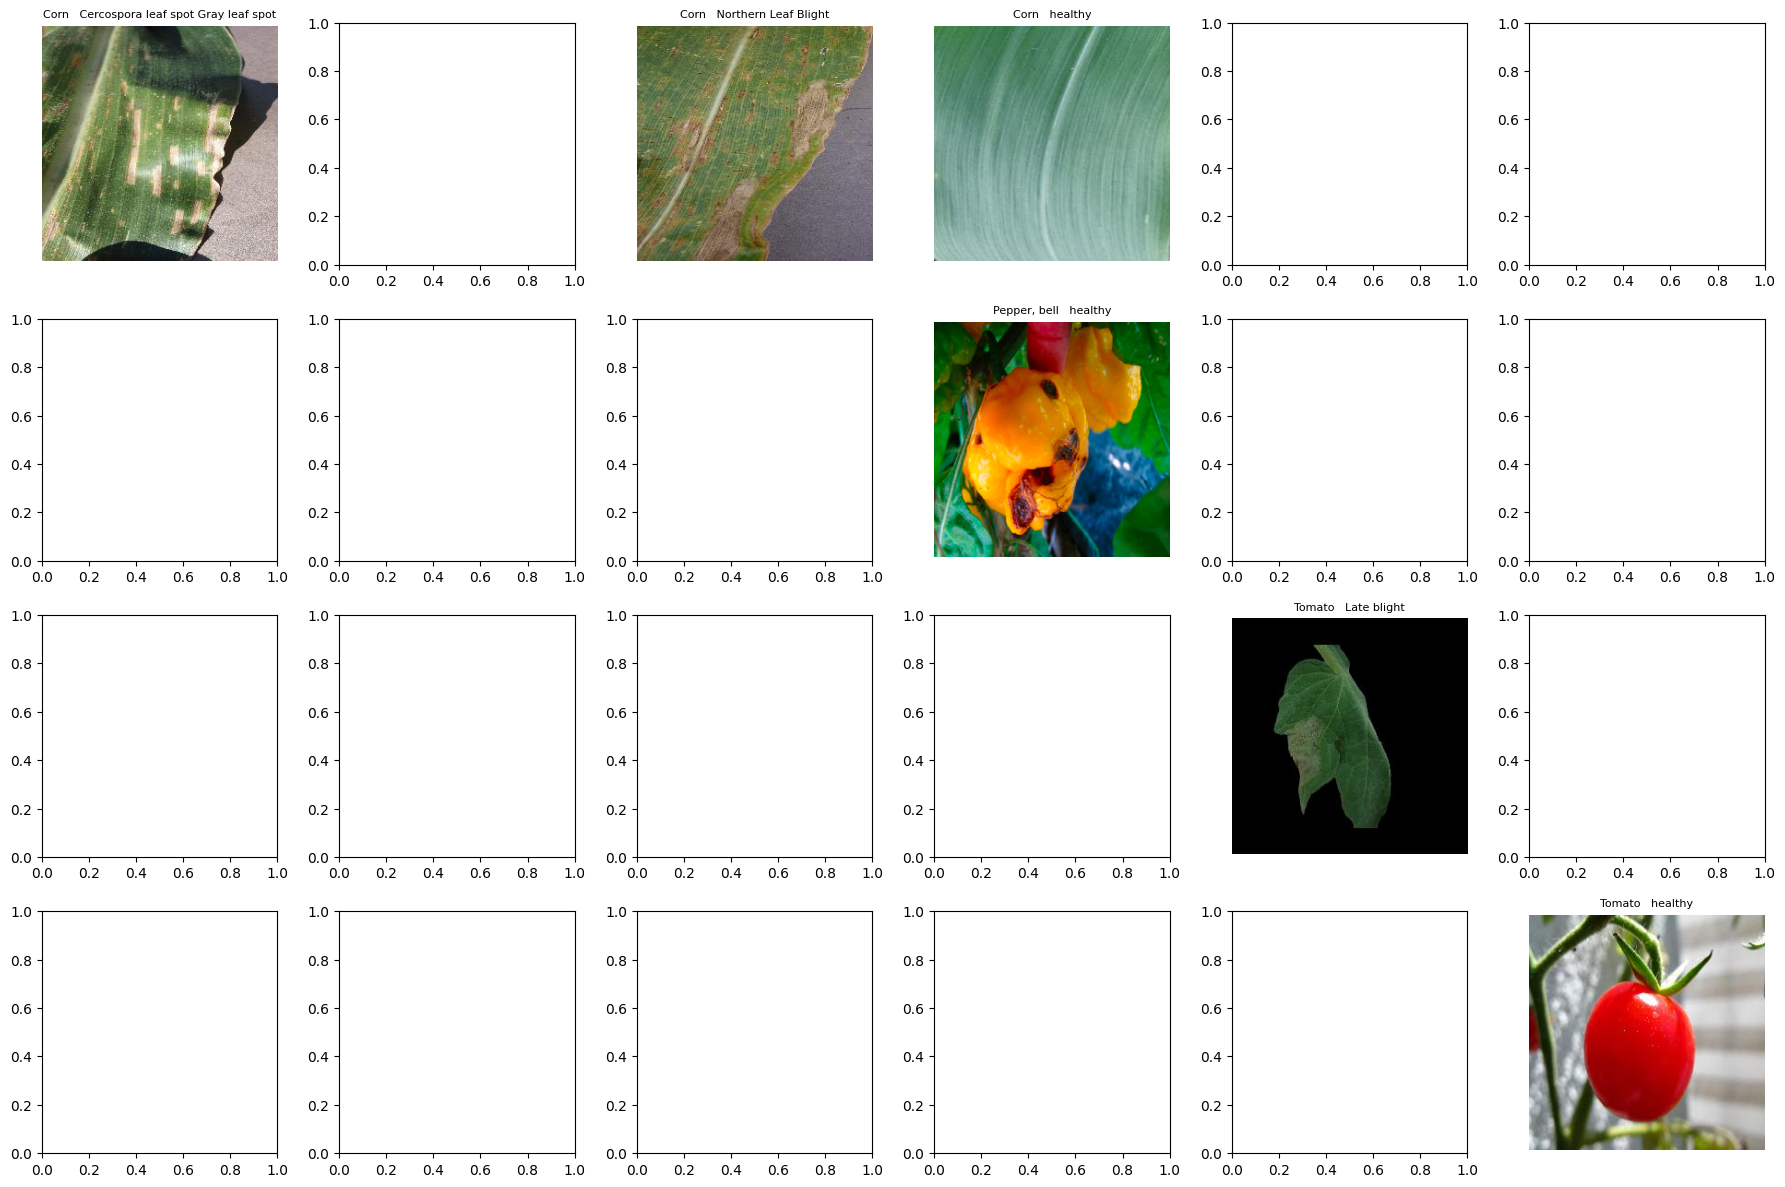

In [4]:
# Display sample images from each class
fig, axes = plt.subplots(4, 6, figsize=(18, 12))
axes = axes.ravel()

for idx, cls in enumerate(classes[:24]):  # Show first 24 classes
    cls_path = os.path.join(train_dir, cls)
    images = [f for f in os.listdir(cls_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if images:
        img_path = os.path.join(cls_path, random.choice(images))
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(cls.replace('_', ' '), fontsize=8)
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 4. Load Pre-trained YOLOv8 Model

In [5]:
# Load YOLOv8 classification model
model = YOLO('yolov8s-cls.pt')  # Using the small classification model
print("Model loaded successfully!")

Model loaded successfully!


## 5. Train the Model

Training parameters optimized for your system (3-hour training):
- **CPU**: AMD Ryzen 5 3500U (4 cores)
- **RAM**: 16GB
- **epochs**: 35 (~3 hours training time)
- **imgsz**: 192 (reduced for faster CPU training)
- **batch**: 8 (conservative for CPU + RAM)
- **workers**: 2 (leaving cores for system)

In [6]:
# Train the model - Optimized for AMD Ryzen 5 3500U (CPU training)
print("Starting training on CPU...")
print("Estimated time: ~3 hours for 35 epochs")
print("You can monitor progress and stop early if results are satisfactory\n")

results = model.train(
    data=data_root,           # Path to dataset
    epochs=35,                # Adjusted for ~3 hour training time
    imgsz=192,                # Reduced for faster CPU training
    batch=8,                  # Conservative batch size for CPU
    patience=15,              # Early stopping patience
    save=True,                # Save checkpoints
    device='cpu',             # CPU training (no dedicated GPU)
    workers=2,                # 2 workers (leave cores for system)
    project='runs/classify',  # Project directory
    name='plant_disease',     # Experiment name
    exist_ok=True,            # Overwrite existing experiment
    pretrained=True,          # Use pretrained weights
    optimizer='Adam',         # Adam optimizer
    lr0=0.001,                # Initial learning rate
    verbose=True,             # Verbose output
    plots=True,               # Generate plots
    cache=False,              # Don't cache (save RAM)
    amp=False                 # Disable AMP for CPU
)

print("\n" + "="*60)
print("Training completed!")
print("="*60)

Starting training on CPU...
Estimated time: ~3 hours for 35 epochs
You can monitor progress and stop early if results are satisfactory

Ultralytics 8.3.253  Python-3.11.9 torch-2.9.1+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
engine\trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=35, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=192, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=

KeyboardInterrupt: 

## 6. Visualize Training Results

In [7]:
# Display training results
results_img_path = "runs/classify/plant_disease/results.png"
if os.path.exists(results_img_path):
    img = Image.open(results_img_path)
    plt.figure(figsize=(16, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Training Results')
    plt.tight_layout()
    plt.show()
else:
    print("Results image not found. Training may still be in progress.")

Results image not found. Training may still be in progress.


## 7. Load Best Model and Validate

In [10]:
# Load the best trained model
best_model = YOLO(r'C:\Users\athar\Downloads\plant_disease_prediction\runs\classify\runs\classify\plant_disease\weights\best.pt')
print("Best model loaded!")

Best model loaded!


In [11]:
# Validate the model on validation set
val_results = best_model.val(data=data_root)
print(f"\nValidation Results:")
print(f"Top-1 Accuracy: {val_results.top1:.4f}")
print(f"Top-5 Accuracy: {val_results.top5:.4f}")

Ultralytics 8.3.253  Python-3.11.9 torch-2.9.1+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
YOLOv8s-cls summary (fused): 30 layers, 5,105,944 parameters, 0 gradients, 12.5 GFLOPs
ERROR train: C:\Users\athar\Downloads\plant_disease_prediction\dataset\train... found 21482 images in 23 classes (requires 24 classes, not 23)
ERROR val: C:\Users\athar\Downloads\plant_disease_prediction\dataset\val... found 6132 images in 23 classes (requires 24 classes, not 23)
ERROR test: C:\Users\athar\Downloads\plant_disease_prediction\dataset\test... found 3087 images in 23 classes (requires 24 classes, not 23)
val: Fast image access  (ping: 0.10.0 ms, read: 103.920.0 MB/s, size: 16.0 KB)
val: Scanning C:\Users\athar\Downloads\plant_disease_prediction\dataset\val... 6132 images, 0 corrupt: 100% ━━━━━━━━━━━━ 6132/6132  0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 384/384 2.9it/s 2:12<0.3s
                   all      0.992          1
Speed: 0.0ms preprocess, 17.9ms infere

## 8. Test the Model on Test Set


0: 192x192 Corn___Cercospora_leaf_spot Gray_leaf_spot 1.00, Corn___Northern_Leaf_Blight 0.00, Corn___Common_rust 0.00, Grape___Esca_(Black_Measles) 0.00, Tomato___Target_Spot 0.00, 22.1ms
1: 192x192 Corn___Northern_Leaf_Blight 1.00, Corn___Cercospora_leaf_spot Gray_leaf_spot 0.00, Tomato___Bacterial_spot 0.00, Corn___Common_rust 0.00, Potato___Late_blight 0.00, 22.1ms
2: 192x192 Corn___healthy 1.00, Tomato___Tomato_Yellow_Leaf_Curl_Virus 0.00, Corn___Northern_Leaf_Blight 0.00, Corn___Cercospora_leaf_spot Gray_leaf_spot 0.00, Tomato___Late_blight 0.00, 22.1ms
Speed: 9.2ms preprocess, 22.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)


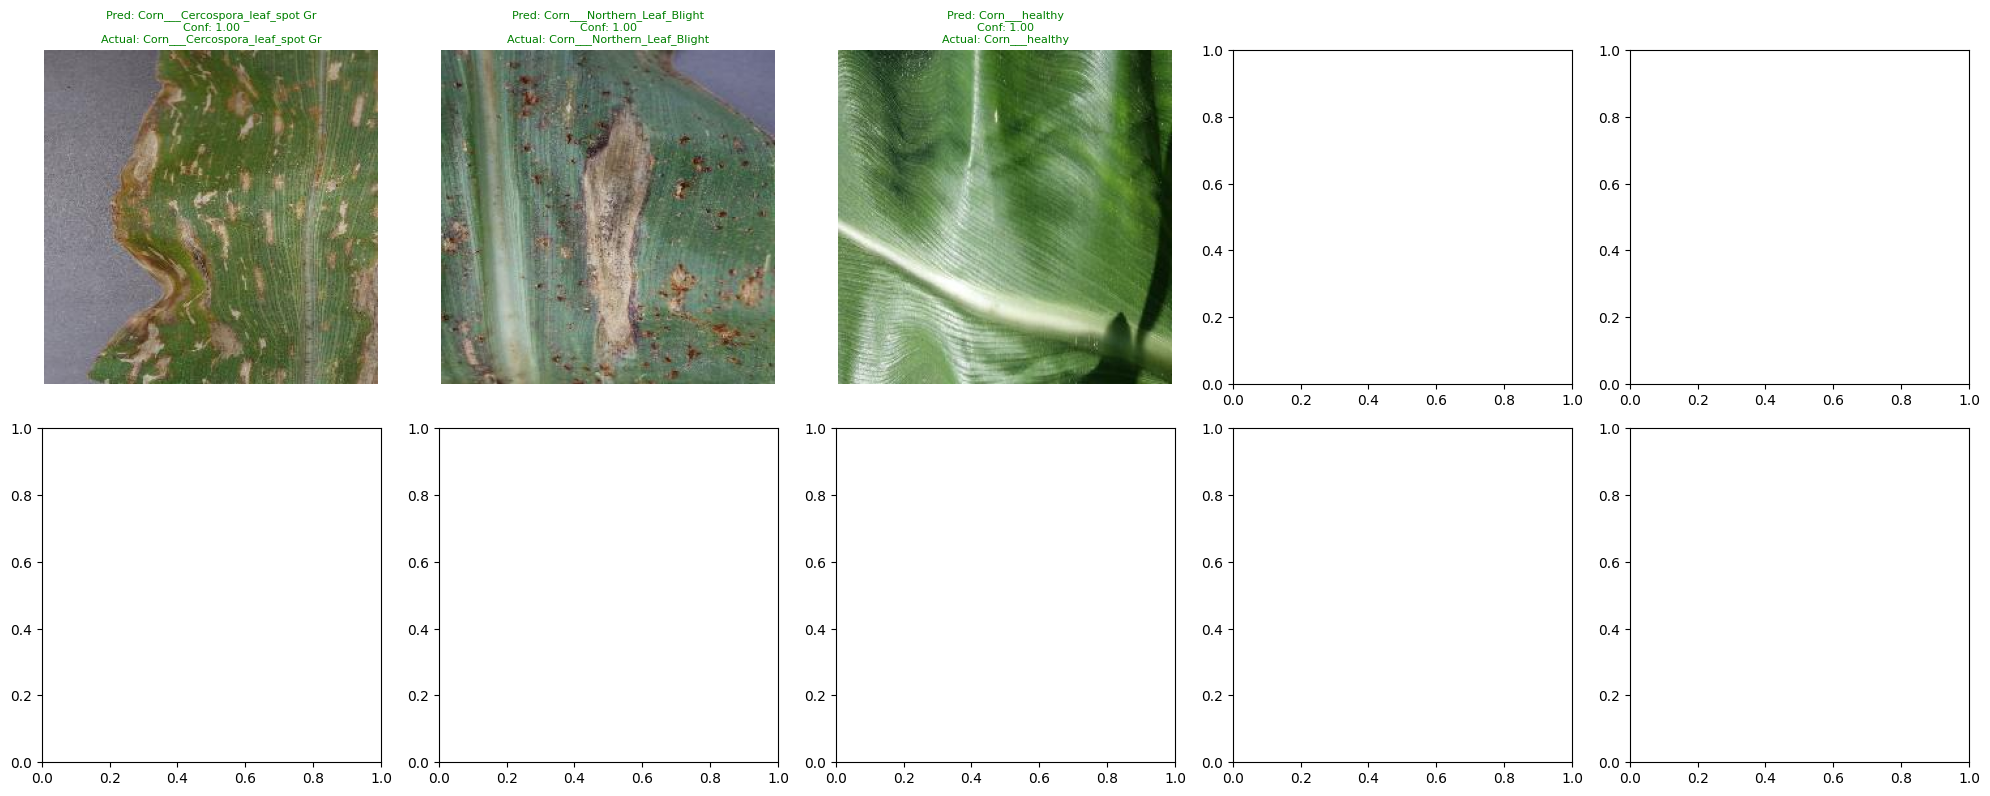

In [12]:
# Get random test images
test_images = []
for cls in classes[:10]:  # Get from first 10 classes
    cls_path = os.path.join(test_dir, cls)
    if os.path.exists(cls_path):
        images = [os.path.join(cls_path, f) for f in os.listdir(cls_path) 
                 if f.endswith(('.jpg', '.jpeg', '.png'))]
        if images:
            test_images.append(random.choice(images))

# Make predictions
if test_images:
    results = best_model.predict(test_images, save=False)
    
    # Display predictions
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.ravel()
    
    for idx, (img_path, result) in enumerate(zip(test_images[:10], results[:10])):
        img = Image.open(img_path)
        axes[idx].imshow(img)
        
        # Get prediction
        probs = result.probs
        top1_idx = probs.top1
        top1_conf = probs.top1conf.item()
        predicted_class = classes[top1_idx]
        actual_class = os.path.basename(os.path.dirname(img_path))
        
        # Set title with color based on correctness
        title = f"Pred: {predicted_class[:30]}\nConf: {top1_conf:.2f}\nActual: {actual_class[:30]}"
        color = 'green' if predicted_class == actual_class else 'red'
        axes[idx].set_title(title, fontsize=8, color=color)
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No test images found!")

## 9. Single Image Prediction Function

Use this function to predict on any image:


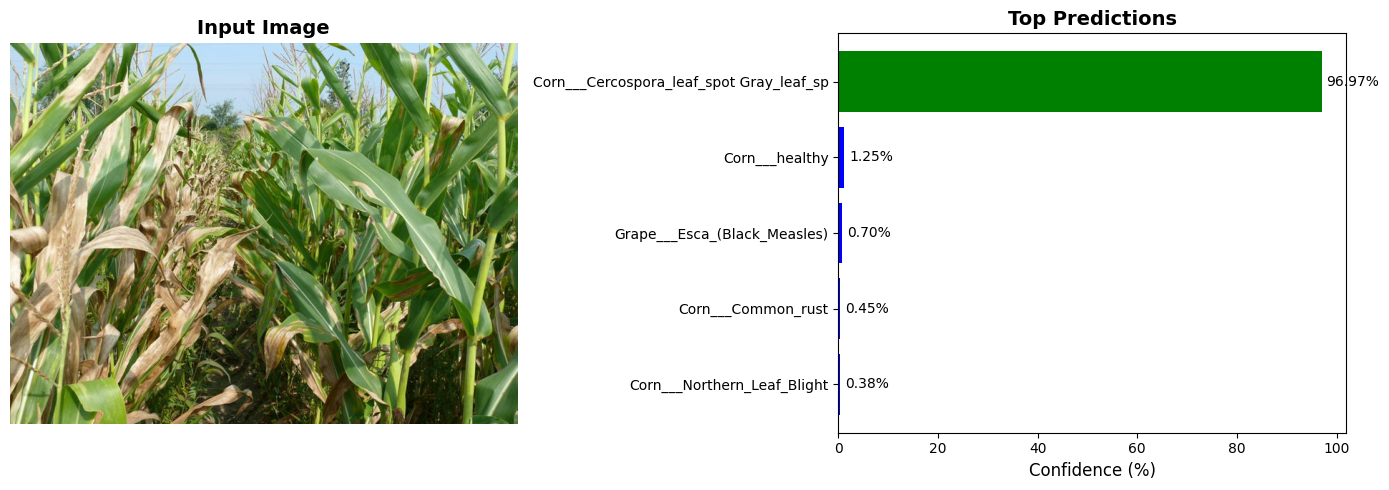


PREDICTION: Corn___Cercospora_leaf_spot Gray_leaf_spot
Confidence: 96.97%


('Corn___Cercospora_leaf_spot Gray_leaf_spot', np.float32(96.97481))

In [16]:
def predict_disease(image_path, model, classes, show_top_n=5):
    """
    Predict plant disease from an image
    
    Args:
        image_path: Path to the image
        model: Trained YOLO model
        classes: List of class names
        show_top_n: Number of top predictions to display
    """
    # Make prediction
    results = model.predict(image_path, save=False, verbose=False)
    result = results[0]
    
    # Get probabilities
    probs = result.probs.data.cpu().numpy()
    
    # Get top predictions
    top_indices = probs.argsort()[-show_top_n:][::-1]
    
    # Display image and predictions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Show image
    img = Image.open(image_path)
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title('Input Image', fontsize=14, fontweight='bold')
    
    # Show predictions
    top_classes = [classes[i] for i in top_indices]
    top_probs = [probs[i] * 100 for i in top_indices]
    
    colors = ['green' if i == 0 else 'blue' for i in range(len(top_classes))]
    ax2.barh(range(len(top_classes)), top_probs, color=colors)
    ax2.set_yticks(range(len(top_classes)))
    ax2.set_yticklabels([f"{cls[:40]}" for cls in top_classes], fontsize=10)
    ax2.set_xlabel('Confidence (%)', fontsize=12)
    ax2.set_title('Top Predictions', fontsize=14, fontweight='bold')
    ax2.invert_yaxis()
    
    # Add percentage labels
    for i, (cls, prob) in enumerate(zip(top_classes, top_probs)):
        ax2.text(prob + 1, i, f'{prob:.2f}%', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{'='*60}")
    print(f"PREDICTION: {top_classes[0]}")
    print(f"Confidence: {top_probs[0]:.2f}%")
    print(f"{'='*60}")
    
    return top_classes[0], top_probs[0]

# Example usage
print("Use this function to predict on any image:")
predict_disease(r'C:\Users\athar\Downloads\plant_disease_prediction\Sweet-corn-leaf-blight.jpg', best_model, classes)

## 10. Export Model for Deployment

In [17]:
# Export model to different formats for deployment
# Uncomment the format you need

# ONNX format (recommended for deployment)
best_model.export(format='onnx')

# TensorFlow SavedModel
#best_model.export(format='saved_model')

# TensorFlow Lite
#best_model.export(format='tflite')

# CoreML (for iOS)
#best_model.export(format='coreml')

print("Model is ready for export!")
print("Uncomment the desired export format above and run the cell.")

Ultralytics 8.3.253  Python-3.11.9 torch-2.9.1+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)

PyTorch: starting from 'C:\Users\athar\Downloads\plant_disease_prediction\runs\classify\runs\classify\plant_disease\weights\best.pt' with input shape (1, 3, 192, 192) BCHW and output shape(s) (1, 24) (29.4 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.4 MB 5.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.8/16.4 MB 4.6 MB/s eta 0:00:04
   ------- -------------------------------- 2.9/16.4 MB 4.3 MB/s eta 0:00:04
   -------- ------------------------------- 3.7/16.4 MB 4.2 MB/s eta 0:00:04
   ---------- ----------------------------- 4.5/16.4 MB 4.1 MB/s eta 0:00:03
   ------------ --------------------------- 5.2/16.4 MB 4.0 MB/s eta 0:00:03
   -------------- --

c:\Users\athar\Downloads\plant_disease_prediction\.venv\Lib\site-packages\torch\onnx\_internal\torchscript_exporter\utils.py:1447: OnnxExporterWarning: Exporting to ONNX opset version 22 is not supported. by 'torch.onnx.export()'. The highest opset version supported is 20. To use a newer opset version, consider 'torch.onnx.export(..., dynamo=True)'. 
  warnings.warn(


ONNX: slimming with onnxslim 0.1.82...
ONNX: export success  64.2s, saved as 'C:\Users\athar\Downloads\plant_disease_prediction\runs\classify\runs\classify\plant_disease\weights\best.onnx' (19.5 MB)

Export complete (64.3s)
Results saved to C:\Users\athar\Downloads\plant_disease_prediction\runs\classify\runs\classify\plant_disease\weights
Predict:         yolo predict task=classify model=C:\Users\athar\Downloads\plant_disease_prediction\runs\classify\runs\classify\plant_disease\weights\best.onnx imgsz=192  
Validate:        yolo val task=classify model=C:\Users\athar\Downloads\plant_disease_prediction\runs\classify\runs\classify\plant_disease\weights\best.onnx imgsz=192 data=dataset  
Visualize:       https://netron.app
Model is ready for export!
Uncomment the desired export format above and run the cell.


## 11. Model Summary and Next Steps

### Model Performance
- Check the validation accuracy above
- Review the training plots for overfitting/underfitting
- Analyze confusion matrix (if generated)

### Next Steps:
1. **Improve Performance:**
   - Increase epochs if underfitting
   - Add data augmentation
   - Try different model sizes (yolov8n-cls, yolov8m-cls, yolov8l-cls)
   - Adjust learning rate

2. **Deploy Model:**
   - Export to ONNX or TFLite
   - Create a web app using Flask/FastAPI
   - Build a mobile app

3. **Additional Features:**
   - Add confidence threshold filtering
   - Implement batch prediction
   - Create disease treatment recommendations
   - Add multi-crop support